In [20]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
#!pip install tensorflow
#!pip install xgboost
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from xgboost import XGBRegressor

In [21]:
#  For running on weather augmented data
X_train_label = pd.read_csv('./data/X_train_label.csv')
X_test_label = pd.read_csv('./data/X_test_label.csv')
Y_train = pd.read_csv('./data/Y_train.csv')
Y_test = pd.read_csv('./data/Y_test.csv')
arr_delay_only_y_train = pd.read_csv('./data/arr_delay_only_y_train.csv')
arr_delay_only_y_test = pd.read_csv('./data/arr_delay_only_y_test.csv')

In [22]:
#  For running on original data
X_train_label = pd.read_csv('./data/old_data/X_train_label.csv')
X_test_label = pd.read_csv('./data/old_data/X_test_label.csv')
Y_train = pd.read_csv('./data/old_data/Y_train.csv')
Y_test = pd.read_csv('./data/old_data/Y_test.csv')
arr_delay_only_y_train = pd.read_csv('./data/old_data/arr_delay_only_y_train.csv')
arr_delay_only_y_test = pd.read_csv('./data/old_data/arr_delay_only_y_test.csv')

# For overall arrival delay

### Linear Regressison model

In [23]:
model = LinearRegression()
model.fit(X_train_label, arr_delay_only_y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_label)

# Calculate the mean absolute error
mae = mean_absolute_error(arr_delay_only_y_test, y_pred)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 24.94155730859324


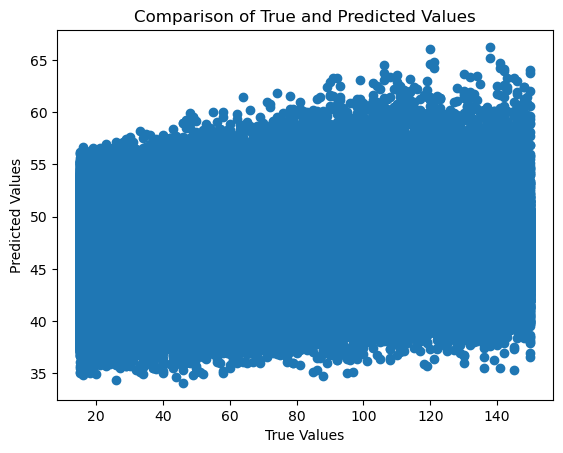

In [24]:
plt.scatter(arr_delay_only_y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Comparison of True and Predicted Values")
plt.show()

### Decision Tree Regressor

In [25]:
tree_model = DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)
tree_model.fit(X_train_label, arr_delay_only_y_train)

# Make predictions on the testing set
y_pred = tree_model.predict(X_test_label)

# Calculate the mean absolute error
mae = mean_absolute_error(arr_delay_only_y_test, y_pred)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 24.14316366417908


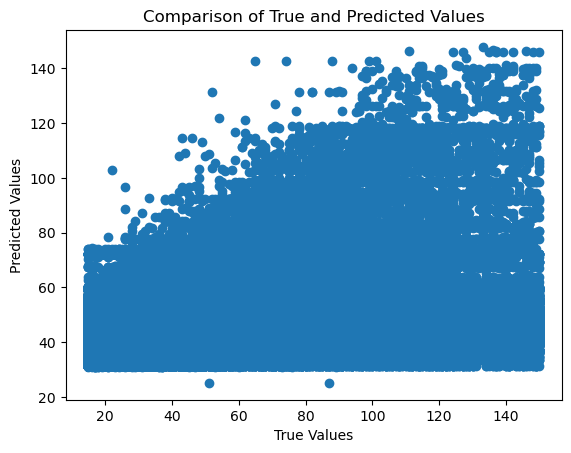

In [26]:
plt.scatter(arr_delay_only_y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Comparison of True and Predicted Values")
plt.show()


### Random Forest Regressor

In [27]:
# Train the Random Forest regressor with custom depth and other parameters
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=2, random_state=42)
rf_model.fit(X_train_label, arr_delay_only_y_train.values.ravel())  # ravel() to convert column vector to 1d array

# Make predictions on the testing set
y_pred = rf_model.predict(X_test_label)

# Calculate the mean absolute error
mae = mean_absolute_error(arr_delay_only_y_test, y_pred)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 24.097529904599973


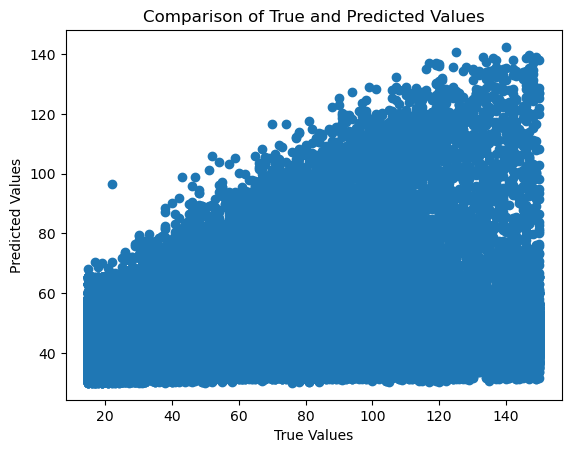

In [28]:
plt.scatter(arr_delay_only_y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Comparison of True and Predicted Values")
plt.show()

# For individual delay components

### Linear Regression




In [29]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train_label, Y_train)

# Make predictions on the testing set
Y_pred = model.predict(X_test_label)

# Calculate the mean absolute error for each column
mae = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

print("Mean Absolute Error for each column:")
for col, column_mae in zip(Y_train.columns, mae):
    print(f"{col}: {column_mae}")

Mean Absolute Error for each column:
DELAY_DUE_CARRIER: 18.23164688895231
DELAY_DUE_WEATHER: 4.058932616123247
DELAY_DUE_SECURITY: 0.30917666721250187
DELAY_DUE_NAS: 8.560322130050302
DELAY_DUE_LATE_AIRCRAFT: 18.859664220923914


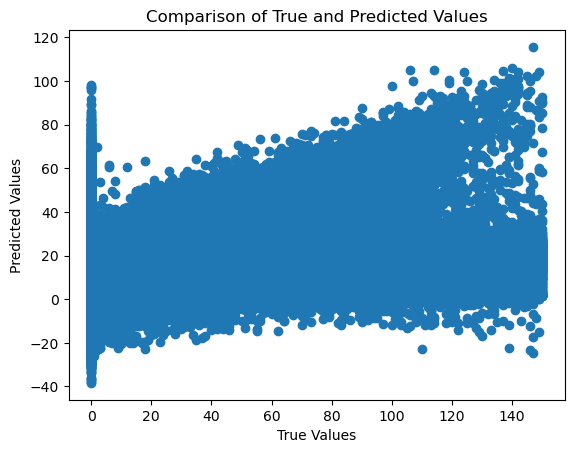

In [30]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Comparison of True and Predicted Values")
plt.show()

### Decision Tree Regressor

In [31]:
tree_model = DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)  # Example: max_depth=10, min_samples_leaf=5
tree_model.fit(X_train_label, Y_train)

# Make predictions on the testing set
Y_pred = tree_model.predict(X_test_label)

# Calculate the mean absolute error for each column
mae = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

print("Mean Absolute Error for each column:")
for col, column_mae in zip(Y_train.columns, mae):
    print(f"{col}: {column_mae}")

Mean Absolute Error for each column:
DELAY_DUE_CARRIER: 17.429164909877148
DELAY_DUE_WEATHER: 4.03003237637786
DELAY_DUE_SECURITY: 0.304593604056985
DELAY_DUE_NAS: 8.090259114252177
DELAY_DUE_LATE_AIRCRAFT: 18.187770137892358


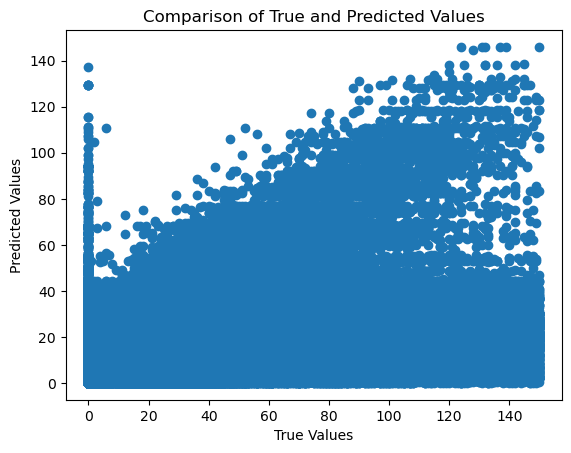

In [32]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Comparison of True and Predicted Values")
plt.show()

### Random Forest Regressor

In [33]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_leaf=5, random_state=42)
rf_model.fit(X_train_label, Y_train)

# Make predictions on the testing set
Y_pred = rf_model.predict(X_test_label)

# Calculate the mean absolute error for each column
mae = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

print("Mean Absolute Error for each column:")
for col, column_mae in zip(Y_train.columns, mae):
    print(f"{col}: {column_mae}")

Mean Absolute Error for each column:
DELAY_DUE_CARRIER: 17.36220184605546
DELAY_DUE_WEATHER: 4.022726910569796
DELAY_DUE_SECURITY: 0.3047948764284003
DELAY_DUE_NAS: 8.02496293730484
DELAY_DUE_LATE_AIRCRAFT: 18.13794717345994


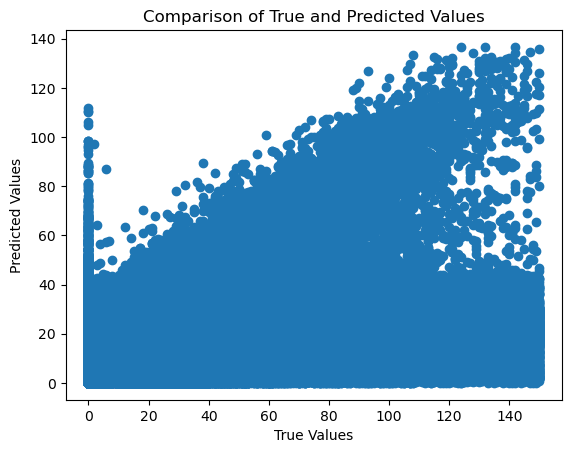

In [34]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Comparison of True and Predicted Values")
plt.show()

### Neural Network

In [35]:
# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_label.shape[1],)),
    Dense(32, activation='relu'),
    Dense(5)  # Number of output neurons should match the number of columns in Y
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_label, Y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on test data
loss, mae = model.evaluate(X_test_label, Y_test)
print("Test Mean Absolute Error:", mae)

# Make predictions
Y_pred = model.predict(X_test_label)

# Calculate Mean Absolute Error for each column
mae_columns = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Absolute Error for each column:")
print(mae_columns)
pd.DataFrame(history.history).to_csv("./models/results/NN_test_aug.csv")

Epoch 1/50


c:\Users\ebror\OneDrive\Documents\GitHub\Project\.conda\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


48517/48517 ━━━━━━━━━━━━━━━━━━━━ 56s 1ms/step - loss: 394.3239 - mae: 10.9428 - val_loss: 358.3516 - val_mae: 10.3769
Epoch 2/50
48517/48517 ━━━━━━━━━━━━━━━━━━━━ 53s 1ms/step - loss: 355.4351 - mae: 9.9517 - val_loss: 354.0915 - val_mae: 9.9949
Epoch 3/50
48517/48517 ━━━━━━━━━━━━━━━━━━━━ 59s 1ms/step - loss: 352.9017 - mae: 9.8892 - val_loss: 351.8631 - val_mae: 10.1006
Epoch 4/50
48517/48517 ━━━━━━━━━━━━━━━━━━━━ 65s 1ms/step - loss: 352.7467 - mae: 9.8824 - val_loss: 351.9022 - val_mae: 9.6864
Epoch 5/50
48517/48517 ━━━━━━━━━━━━━━━━━━━━ 61s 1ms/step - loss: 351.9748 - mae: 9.8607 - val_loss: 349.8576 - val_mae: 9.7214
Epoch 6/50
48517/48517 ━━━━━━━━━━━━━━━━━━━━ 61s 1ms/step - loss: 350.8192 - mae: 9.8289 - val_loss: 351.6453 - val_mae: 9.7542
Epoch 7/50
48517/48517 ━━━━━━━━━━━━━━━━━━━━ 62s 1ms/step - loss: 349.6686 - mae: 9.8122 - val_loss: 349.3743 - val_mae: 9.4928
Epoch 8/50
48517/48517 ━━━━━━━━━━━━━━━━━━━━ 61s 1ms/step - loss: 349.5647 - mae: 9.8088 - val_loss: 351.7237 - val_mae:

### XGBoost Regressor

In [36]:
xgb_regressor = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_regressor.fit(X_train_label, Y_train)

Y_test_pred = xgb_regressor.predict(X_test_label)
Y_train_pred = xgb_regressor.predict(X_train_label)

test_mae = mean_absolute_error(Y_test, Y_test_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)

train_mae = mean_absolute_error(Y_train, Y_train_pred)
train_mse = mean_squared_error(Y_train, Y_train_pred)

print(f"Train Mean Absolute Error: {train_mae}")
print(f"Test Mean Absolute Error: {test_mae}")

print(f"Train Mean Squared Error: {train_mse}")
print(f"Test Mean Squared Error: {test_mse}")

Train Mean Absolute Error: 9.101083755493164
Test Mean Absolute Error: 9.149923324584961
Train Mean Squared Error: 318.5647888183594
Test Mean Squared Error: 322.20892333984375


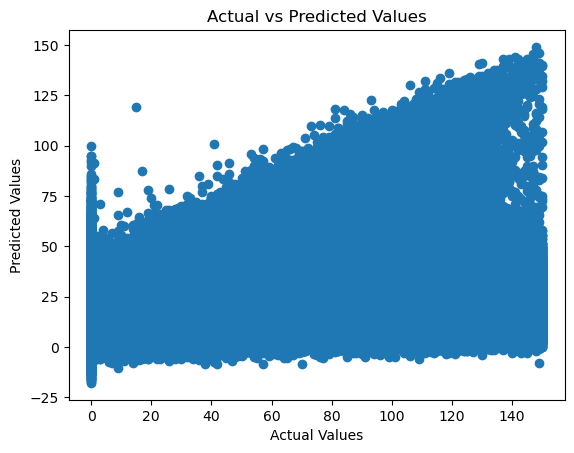

In [37]:
plt.scatter(Y_train, Y_train_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

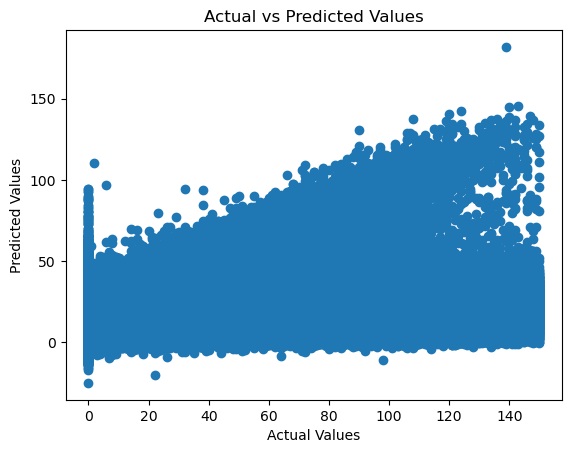

In [38]:
plt.scatter(Y_test, Y_test_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()